In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
from netCDF4 import Dataset
import IPython.display
import cmocean
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cft
#import cosima_cookbook as cc
#from mpl_toolkits.basemap import Basemap
import math
from os import listdir
from os.path import isfile, join
#from alive_progress import alive_bar
import time
import sys
import cftime
import nc_time_axis
import random

###################################################################################################
###################################################################################################

def get_lat_idx(lat, region):
    '''
    Get a list of variables associated with a pre-defined name.
    '''
    if region == 'Antarctic':
        idx = lat < -50
    elif region == 'Arctic':
        idx = lat > 45
    elif region == 'SH':
        idx = lat < 0
    elif region == 'NH':
        idx = lat > 0
    return idx



def ProgressBar(Total, Progress, BarLength=20, ProgressIcon="#", BarIcon="-"):
    try:
        # You can't have a progress bar with zero or negative length.
        if BarLength <1:
            BarLength = 20
        # Use status variable for going to the next line after progress completion.
        Status = ""
        # Calcuting progress between 0 and 1 for percentage.
        Progress = float(Progress) / float(Total)
        # Doing this conditions at final progressing.
        if Progress >= 1.:
            Progress = 1
            Status = "\r\n"    # Going to the next line
        # Calculating how many places should be filled
        Block = int(round(BarLength * Progress))
        # Show this
        Bar = "[{}] {:.0f}% {}".format(ProgressIcon * Block + BarIcon * (BarLength - Block), round(Progress * 100, 0), Status)
        return Bar
    except:
        return "ERROR"


def ShowBar(Bar):
    sys.stdout.write(Bar)
    sys.stdout.flush()




###################################################################################################

Progress: [####################] 100% 
Progress: [####################] 100% 
Progress: [####################] 100% 

Done.


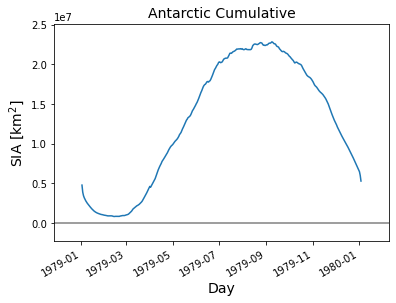

In [3]:
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history' #'/g/data/dy43/cice-dirs/runs/nowaves/history'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = sorted(onlyfiles)
max_len = 365
var = 'SIA' # SIA
region = 'Antarctic' # Antarctic, Arctic, SH, NH
year = '2014'

#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "Computer Modern Roman"
#})

#ice_extent = [0]#np.zeros(max_len)

data_vector = []
dates = []

for counter, filename in enumerate(onlyfiles):
    progressBar = "\rProgress: " + ProgressBar(max_len, counter+1, 20, '#', '.')
    ShowBar(progressBar)
#    if year in filename:    # search for string
        #print 'found string in file %s' %fname
        #print('Opening: '+mypath +'/'+ filename)

    ds = xr.open_dataset(mypath +'/'+ filename)

    ln = ds.TLON.values
    lt = ds.TLAT.values
    tarea = ds.tarea.values
    #print(type(ds.indexes['time']))
    #ds.indexes['time'].to_datetimeindex()
    #print(type(ds.indexes['time']))
    #ds.indexes['time'].to_datetimeindex()

    if var == 'SIA':
        aice_temp = np.squeeze(ds.aice[0,:,:])
        #idx = lt < 0
        idx = get_lat_idx(lt, region)
        aice = np.multiply(aice_temp,idx)
        data_timestep = np.sum(np.multiply(aice,tarea))
        data_vector += [data_timestep.values*(10 ** -6)]
    else:
        idx = get_lat_idx(lt, region)
        data_temp = np.squeeze(ds[var][0,:,:])
        aice_temp = np.squeeze(ds.aice[0,:,:])
        aice = np.multiply(aice,idx)
        data_timestep = np.sum(np.multiply(data_temp,idx))/np.sum(np.multiply(aice,tarea))
        data_vector += [data_timestep.values]

    #temp_date = ds['time'].values[0]
    #print(temp_date)
    #print(temp_date.values)
    #print(temp_date['time'].to_datetimeindex())
   # print(type(temp_date.astype("datetime64[ns]")))
    #print(datetime(temp_date.isoformat()))
    # WIM: <class 'cftime._cftime.DatetimeNoLeap'>, 2003-01-02 00:00:00
    # nowaves: <class 'numpy.datetime64'> 2003-04-09T00:00:00.000000000

    #dates.append(pd.to_datetime(pd.Timestamp(ds.time.values[0])))
    dates.append(ds.time.values)
    if counter > max_len:
        break

#print(dates)
dataframe = pd.DataFrame({'dates': dates,
                    'classes': data_vector})


#plt.plot(dataframe.dates, dataframe.classes)
plt.plot(dates, dataframe.classes)
plt.axhline(0,color='gray') # x = 0
plt.title(region+' Cumulative', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.margins(0.1)
if var == 'SIA':
    plt.ylabel(var + ' [km$^2$] ', fontsize=14)
else:
    plt.ylabel(var + '/Ice area [/km$^2$] ', fontsize=14)


plt.savefig('/home/566/nd0349/notebooks/ts_'+var+'-'+region+'.png',dpi=300)
print('\nDone.')

In [5]:
dataframe.max()

dates      [1980-01-03T00:00:00.000000000]
classes                    22837421.146112
dtype: object

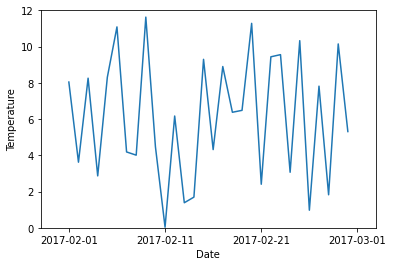

In [4]:





calendar = "360_day"
dt = [
    cftime.datetime(year=2017, month=2, day=day, calendar=calendar)
    for day in range(1, 31)
]
temperatures = [round(random.uniform(0, 12), 3) for _ in range(len(dt))]

plt.plot(dt, temperatures)
plt.margins(0.1)
plt.ylim(0, 12)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()